# Cross Validation

It's a techique to spliting the dataset to perform train and test where each dataset has been tested and returned us the avg/mean accuracy.
Most commonly use K-Fold Cross Validation. 

Sometimes it's not enough to compare different ML model using one train-test split. It's highly possible one can provide us good result for specfic ML model for that `random_state`. But CV provide us good estimate not necessary to be guaranted. 

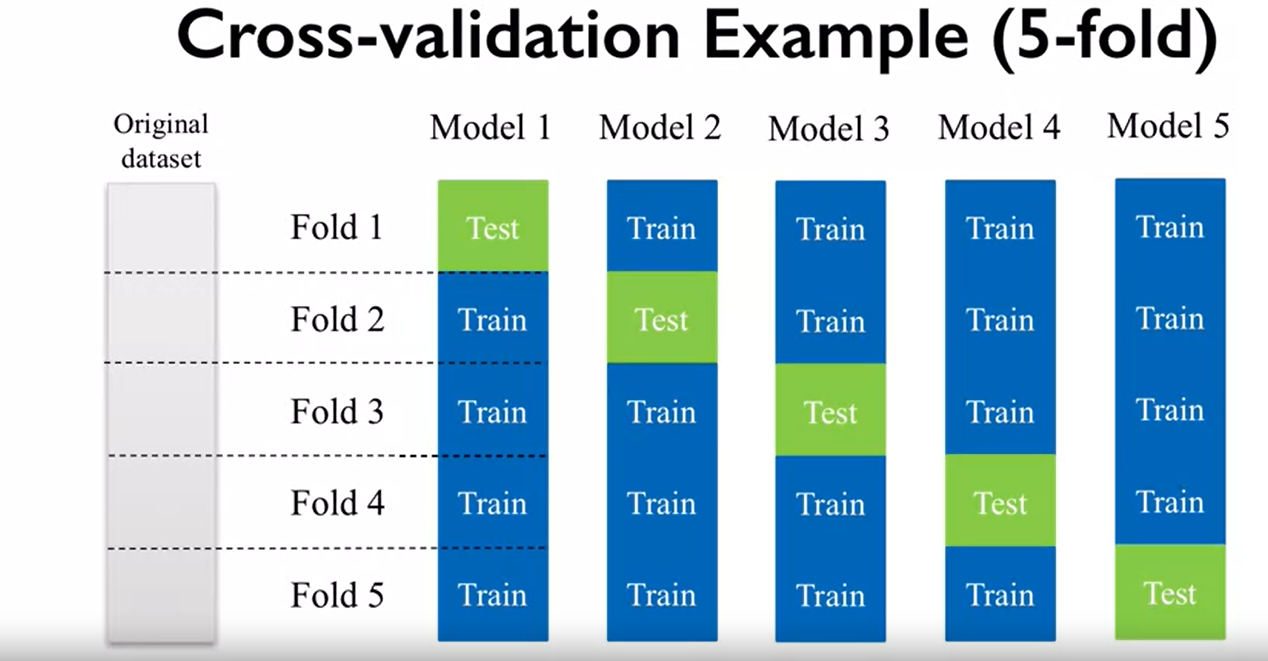

# Import Libaries

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


%matplotlib notebook
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
fruits = pd.read_table("../course3/assets/fruit_data_with_colors.txt")
fruits.head(3)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60


In [5]:
X = fruits[["width", "height"]]

y = fruits["fruit_label"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) #bydefault train/test = 75/25) 

print("unique value of target variable (y): {}".format(np.unique(y)))
print("train data size: {}".format(X_train.shape))
print("test data size: {}".format(X_test.shape))

knn_clf = KNeighborsClassifier(n_neighbors= 5).fit(X_train, y_train)
print("training accuracy: {}".format(knn_clf.score(X_train, y_train)))
print("test accuracy: {}".format(knn_clf.score(X_test, y_test)))

unique value of target variable (y): [1 2 3 4]
train data size: (47, 2)
test data size: (12, 2)
training accuracy: 0.851063829787234
test accuracy: 0.8333333333333334


# Model Evaluation with K-fold Cross Validation 

In [7]:
from sklearn.model_selection import cross_val_score
print("Feateures Variable X of fruits dataset(width,height)")
print("Target Variable y of fruits dataset(fruit_label)")

knn = KNeighborsClassifier(n_neighbors = 5)

cv_scores = cross_val_score(knn, X, y, cv=5)

print("cross validation accuracy score of different train/test split(Kfold = 5): \n {}".format(cv_scores))
print("mean accuracy score of CV (K-fold = 5) evaluation:{:.3f}".format(np.mean(cv_scores)))

print("It provides us the average accuracy the model will perform. \nCross Validation takes more time to do perform the evaluation for computation.")

Feateures Variable X of fruits dataset(width,height)
Target Variable y of fruits dataset(fruit_label)
cross validation accuracy score of different train/test split(Kfold = 5): 
 [0.75       0.75       0.83333333 0.83333333 0.81818182]
mean accuracy score of CV (K-fold = 5) evaluation:0.797
It provides us the average accuracy the model will perform. 
Cross Validation takes more time to do perform the evaluation for computation.


# Strtified K-fold Cross Validation

1. To remove bias ordering. Let's say, we have a dataset which have only class-01 in 1st K-fold (20%) of Data and so on. Therefore we get a bias result during evaluation
2. In case of Stratified K-fold, it maintains the class propotionality for each class in each K-fold both training and testing

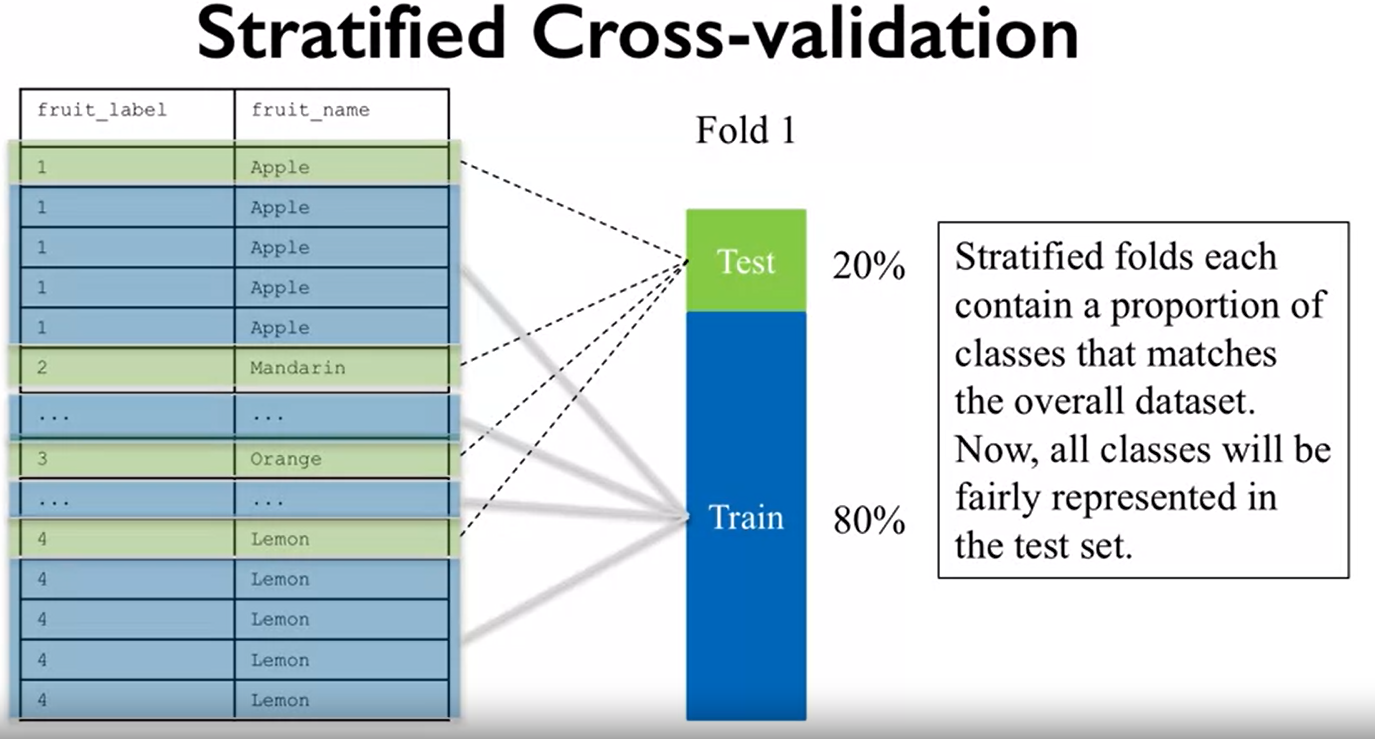

# Leave-One-Out Cross Validation

1. just like K--Fold
2. In this CV, we have one test dataset and others work as training for each **FOLD** and so on.
3. High Computation. It gives fruitful result for smalldataset
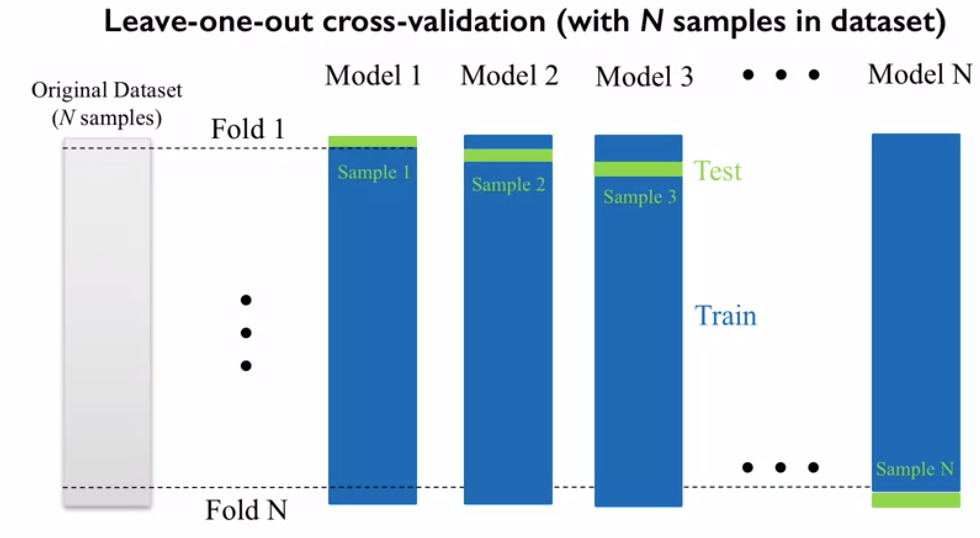

# Validation Curve Sensitivity for important Parameters


<h4>Support Vector Machine (SVM) for SVC[Classifier]</h4>

In [15]:
from sklearn.svm import SVC

from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4) #4

train_scores, test_scores = validation_curve(SVC(), X, y, param_name = 'gamma',
                                             param_range = param_range, cv = 5)

print("training score on each fold: \n {}".format(train_scores))
print("testing score on each fold: \n {}".format(test_scores))
print("here, each row represents gamma parameters change in value and there are four rows due to `param_range`.")
print("Whereas each column represents **each FOLD** and we have 5-Fold of `cv`.")

training score on each fold: 
 [[0.46808511 0.40425532 0.40425532 0.34042553 0.33333333]
 [0.82978723 0.78723404 0.76595745 0.74468085 0.75      ]
 [0.87234043 0.89361702 0.89361702 0.89361702 0.85416667]
 [0.9787234  1.         0.9787234  1.         0.97916667]]
testing score on each fold: 
 [[0.58333333 0.33333333 0.33333333 0.25       0.27272727]
 [0.83333333 0.66666667 0.66666667 0.75       0.72727273]
 [0.41666667 0.66666667 0.83333333 0.83333333 0.81818182]
 [0.33333333 0.33333333 0.25       0.33333333 0.36363636]]
here, each row represents gamma parameters change in value and there are four rows due to `param_range`.
Whereas each column represents **each FOLD** and we have 5-Fold of `cv`.


In [16]:
# Validation Curve

train_score_mean: [0.39007092 0.77553191 0.88147163 0.9873227 ] 
train_score_std: [0.0493405  0.03090604 0.01594661 0.01035224] 
test_score_mean: [0.35454545 0.72878788 0.71363636 0.32272727] 
test_score_std: [0.11905274 0.0618063  0.16123376 0.03821067]


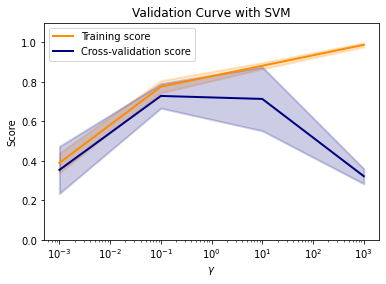

In [23]:
train_score_mean = np.mean(train_scores, axis = 1)
train_score_std = np.std(train_scores, axis = 1)
test_score_mean = np.mean(test_scores, axis = 1)
test_score_std = np.std(test_scores, axis = 1)
print("train_score_mean: {} \ntrain_score_std: {} \ntest_score_mean: {} \ntest_score_std: {}"
      .format(train_score_mean, train_score_std, test_score_mean, test_score_std))



plt.title("Validation Curve with SVM")
plt.xlabel("gamma"     #(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_score_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_score_mean - train_score_std,
    train_score_mean + train_score_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_score_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_score_mean - test_score_std,
    test_score_mean + test_score_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()